# Section 2: Hydrodynamic Schrödinger Equation (HSE)

In this section we simulates the quantum evolution of a simplified 1D Burgers’ Equation using the Hydrodynamic Schrödinger Equation (HSE) approach, followed by-

- 2 Qubits i.e. 4 Grid Points and then 4 Qubits i.e. 16 Grid Points
- Trotterized Hamiltonian evolution
- Outputs probability of basis states (e.g., |00>, |01>, |10>, |11> ) over time, when 2 Qubits
- Outputs probability of basis states (e.g., |0000>, |0001>, so on..) over time, when 4 Qubits
- Observing and analysis various plots
- Updated HSE with Noise Modeling

# Overview of the Hydrodynamic Schrödinger Equation (HSE)

- The HSE method in generic, converts the nonlinear Burgers’ Equation into a quantum-like Schrödinger Equation using a complex wavefunction ψ . But, here our focus mainly build a **practical quantum circuit implementation using simplified Hamiltonian.** 
- That is directly builds a **toy quantum Hamiltonian with Pauli operators**, runs ApproxTimeEvolution, and measures qubit probabilities.
- Our approach here is not actually a Physics inspired but a **circuit-inspired** - A quantum simulation using hardware-implementable gates, so that we can implement the quantum Burgers simulation on real or simulated quantum hardware.

# Understanding the workflow in a mathematical way

- First, we constructs a **custom or toy Hamiltonian using Pauli gates:** H = ν⋅(Z⊗Z) + X . That is we model viscous effects with simple Pauli terms. Toy Hamiltonian combining Pauli Z⊗Z interaction (entanglement) and Pauli X (rotation) to mimic dissipative fluid behavior.
- Then we **initializes superposition state by Hadamard superposition** and applies Trotterized time evolution using simplified Hamiltonian. And then measured full probability distribution of qubit states.
- We treats this probabilities as an analog for fluid behavior.
- As real quantum hardware is noisy - because of gate errors, qubits lose quantum information etc. That's why **we implement the same with a Depolarizing Noise approach.** It helps us test how stable or robust our HSE simulation is under the realistic conditions.

#### Importing necessary libraries

In [1]:
import numpy as np
from pennylane import numpy as pnp
import pennylane as qml
import matplotlib.pyplot as plt

# For 2 Qubits (4 Grid Points)

#### Define a Quantum Device (2 Qubits)

In [2]:
dev = qml.device("default.qubit", wires=2)

#### Define the Hamiltonian

In [3]:
def burgers_hamiltonian(nu):
    return nu * qml.PauliZ(0) @ qml.PauliZ(1) + qml.PauliX(0) # Burgers' simplified Hamiltonian using Z ⊗ Z and X terms

#### Quantum Circuit using Trotterized ApproxTimeEvolution

In [4]:
@qml.qnode(dev)
def quantum_burgers_circuit(time, nu):
    # Initialize state using Hadamards
    qml.Hadamard(wires=0) 
    qml.Hadamard(wires=1)

    # Define Hamiltonian
    H = burgers_hamiltonian(nu)

    # Apply approximate time evolution
    qml.ApproxTimeEvolution(H, time, 1)  # First we took, n=1 Trotter step

    # Measure probability distribution
    return qml.probs(wires=[0, 1])

- Applies a Hadamard gate to both qubits (wire 0 and wire 1). This creates a superposition state and gives an equal probability amplitude across all 4 basis states.
- The Hamiltonian H encodes how the system behaves (i.e., the physics).
- Approximate Time Evolution evolves the quantum system under Hamiltonian H for a duration 'time' using Trotterization with n step (we took n=1) and simulates e^-iHt|ψ> . That is this tells the quantum system evolve according to Burgers’ physics for 'time' seconds.

#### Circuit Diagram

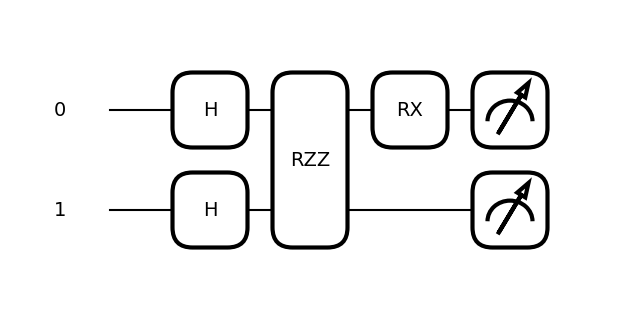

In [5]:
import matplotlib.pyplot as plt

fig, ax = qml.draw_mpl(quantum_burgers_circuit, level="device")(time=0.5, nu=0.01)
plt.show()

#### Run Simulation Over Time Steps

In [6]:
times = np.linspace(0, 1, 6)  # Time steps
nu = 0.1  # Viscosity coefficient
Quantum_results = []

for t in times:
    probs = quantum_burgers_circuit(t, nu)
    Quantum_results.append(probs)
    print(f"Time {t:.2f} -> Quantum Probabilities: {probs}")

Time 0.00 -> Quantum Probabilities: [0.25 0.25 0.25 0.25]
Time 0.20 -> Quantum Probabilities: [0.25389315 0.24610685 0.24610685 0.25389315]
Time 0.40 -> Quantum Probabilities: [0.26433182 0.23566818 0.23566818 0.26433182]
Time 0.60 -> Quantum Probabilities: [0.27789411 0.22210589 0.22210589 0.27789411]
Time 0.80 -> Quantum Probabilities: [0.28981257 0.21018743 0.21018743 0.28981257]
Time 1.00 -> Quantum Probabilities: [0.29516238 0.20483762 0.20483762 0.29516238]


#### Plot the Time Evolution of the Probability Distribution

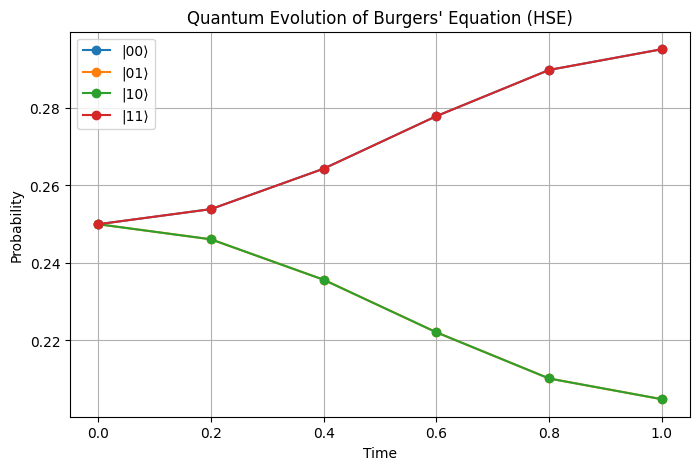

In [7]:
labels = ['00', '01', '10', '11']
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(4):
    y = [p[i] for p in Quantum_results]
    ax.plot(times, y, marker='o', label=f'|{labels[i]}⟩')

ax.set_title("Quantum Evolution of Burgers' Equation (HSE)")
ax.set_xlabel("Time")
ax.set_ylabel("Probability")
ax.legend()
plt.grid(True)
plt.show()

- At time t = 0, the probabilities of all 4 basis states are roughly equal (around 0.25). As time increases, the system evolves. |11> (i.e., red) increases in probability while |10> (i.e., green) decreases in probability.

#### Increasing Trotter Step

In [8]:
@qml.qnode(dev)
def quantum_burgers_circuit(time, nu):
    # Initialize state using Hadamards
    qml.Hadamard(wires=0) 
    qml.Hadamard(wires=1)

    # Define Hamiltonian
    H = burgers_hamiltonian(nu)

    # Apply approximate time evolution
    qml.ApproxTimeEvolution(H, time, 10)  # let's n=10 Trotter step

    # Measure probability distribution
    return qml.probs(wires=[0, 1])

- Time evolution with a Hamiltonian like H = H1 + H2 which is hard to simulate directly. Instead, we use Trotter-Suzuki decomposition. Hence we increse the value of n to get more accurate result.

#### Run Simulation Over Time Steps

In [9]:
times = np.linspace(0, 1, 6)  # Time steps
nu = 0.1  # Viscosity coefficient
Quantum_results = []

for t in times:
    probs = quantum_burgers_circuit(t, nu)
    Quantum_results.append(probs)
    print(f"Time {t:.2f} -> Quantum Probabilities: {probs}")

Time 0.00 -> Quantum Probabilities: [0.25 0.25 0.25 0.25]
Time 0.20 -> Quantum Probabilities: [0.2521676 0.2478324 0.2478324 0.2521676]
Time 0.40 -> Quantum Probabilities: [0.25829072 0.24170928 0.24170928 0.25829072]
Time 0.60 -> Quantum Probabilities: [0.26729652 0.23270348 0.23270348 0.26729652]
Time 0.80 -> Quantum Probabilities: [0.27760616 0.22239384 0.22239384 0.27760616]
Time 1.00 -> Quantum Probabilities: [0.28741031 0.21258969 0.21258969 0.28741031]


#### Plot the Time Evolution of the Probability Distribution

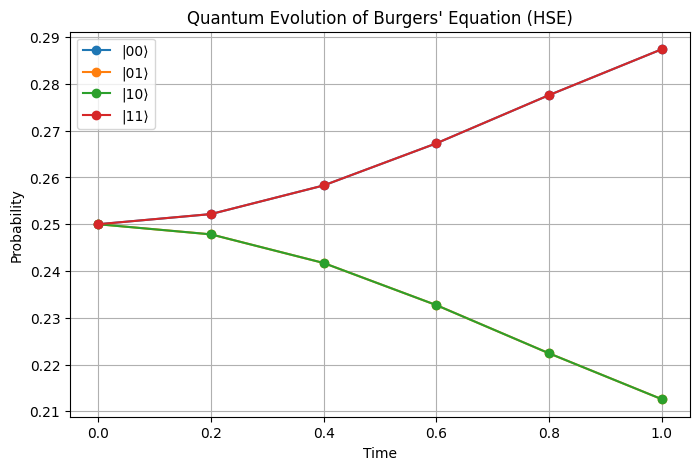

In [10]:
labels = ['00', '01', '10', '11']
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(4):
    y = [p[i] for p in Quantum_results]
    ax.plot(times, y, marker='o', label=f'|{labels[i]}⟩')

ax.set_title("Quantum Evolution of Burgers' Equation (HSE)")
ax.set_xlabel("Time")
ax.set_ylabel("Probability")
ax.legend()
plt.grid(True)
plt.show()

#### Define Mock Target Data (Classical Solution Reference)

In [11]:
# This is mock data for comparison; we can replace with real solver if needed.
target_results = [[0.25 + 0.05*t, 0.25 - 0.02*t, 0.25 - 0.01*t, 0.25 + 0.03*t] for t in times]

#### Plot the Time Evolution of the Probability Distribution

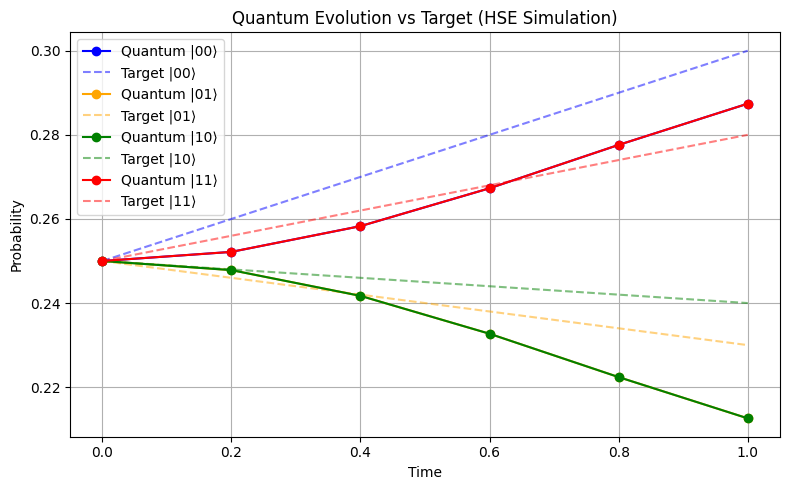

In [12]:
# Plot Quantum vs Target for Each State
labels = ['00', '01', '10', '11']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 5))

for i in range(4):
    # Quantum evolution
    y_quantum = [p[i] for p in Quantum_results]
    plt.plot(times, y_quantum, marker='o', color=colors[i], label=f'Quantum |{labels[i]}⟩')

    # Target evolution
    y_target = [p[i] for p in target_results]
    plt.plot(times, y_target, linestyle='--', color=colors[i], alpha=0.5, label=f'Target |{labels[i]}⟩')

plt.title("Quantum Evolution vs Target (HSE Simulation)")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# For 4 Qubits (16 Grid Points)

#### Define a Quantum Device (4 Qubits)

In [13]:
dev = qml.device("default.qubit", wires=4)

#### Define the Hamiltonian

In [14]:
def burgers_hamiltonian_4q(nu):
    return (nu*(qml.PauliZ(0) @ qml.PauliZ(1) + qml.PauliZ(1) @ qml.PauliZ(2) + qml.PauliZ(2) @ qml.PauliZ(3)) + 
            qml.PauliX(0) + qml.PauliX(1) + qml.PauliX(2) + qml.PauliX(3))

#### Quantum Circuit using Trotterized ApproxTimeEvolution

In [15]:
@qml.qnode(dev)
def quantum_burgers_4qubit(time, nu):
    for i in range(4):
        qml.Hadamard(wires=i)   # Initialize state using Hadamards
    H = burgers_hamiltonian_4q(nu)    # Define Hamiltonian
    qml.ApproxTimeEvolution(H, time, 1) # Apply approximate time evolution
    return qml.probs(wires=[0, 1, 2, 3])  # Measure probability distribution

#### Circuit Diagram

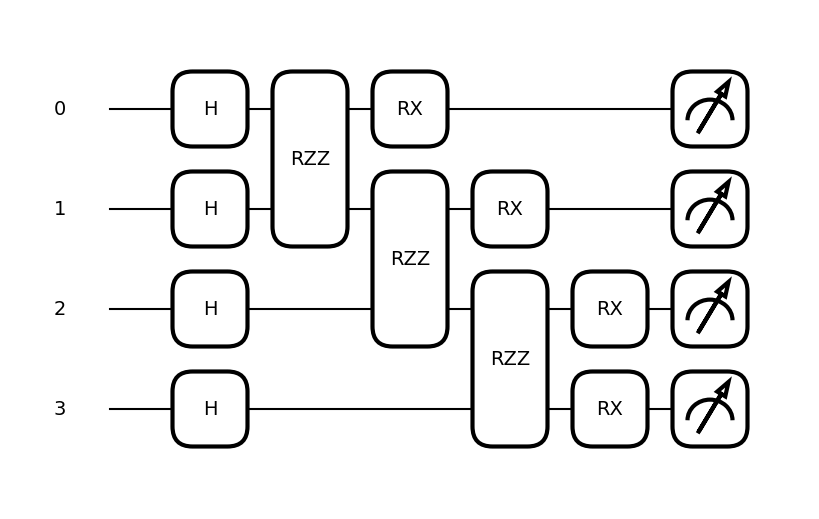

In [16]:
import matplotlib.pyplot as plt

fig, ax = qml.draw_mpl(quantum_burgers_4qubit, level="device")(time=0.5, nu=0.01)
plt.show()

#### Run Simulation Over Time Steps

In [17]:
times = np.linspace(0, 1, 6)  # Time steps
nu = 0.1     # Viscosity coefficient
Quantum_results = []

for t in times:
    p = quantum_burgers_4qubit(t, nu)
    Quantum_results.append(p)
    print(f"Time {t:.2f} -> Quantum Probabilities: {p}")

Time 0.00 -> Quantum Probabilities: [0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
Time 0.20 -> Quantum Probabilities: [0.06795757 0.06424007 0.06065711 0.06431404 0.06065711 0.05720583
 0.06072821 0.06424007 0.06424007 0.06072821 0.05720583 0.06065711
 0.06431404 0.06065711 0.06424007 0.06795757]
Time 0.40 -> Quantum Probabilities: [0.07825334 0.0670784  0.05712526 0.06748122 0.05712526 0.04836198
 0.05749614 0.0670784  0.0670784  0.05749614 0.04836198 0.05712526
 0.06748122 0.05712526 0.0670784  0.07825334]
Time 0.60 -> Quantum Probabilities: [0.07954095 0.06711029 0.05707533 0.06641604 0.05707533 0.04936338
 0.05630839 0.06711029 0.06711029 0.05630839 0.04936338 0.05707533
 0.06641604 0.05707533 0.06711029 0.07954095]
Time 0.80 -> Quantum Probabilities: [0.06390605 0.0619208  0.06306846 0.05879453 0.06306846 0.06736388
 0.05995703 0.0619208  0.0619208  0.05995703 0.06736388 0.06306846
 0.05879453 0.06306846 0.061920

#### Plot the Time Evolution of the Probability Distribution

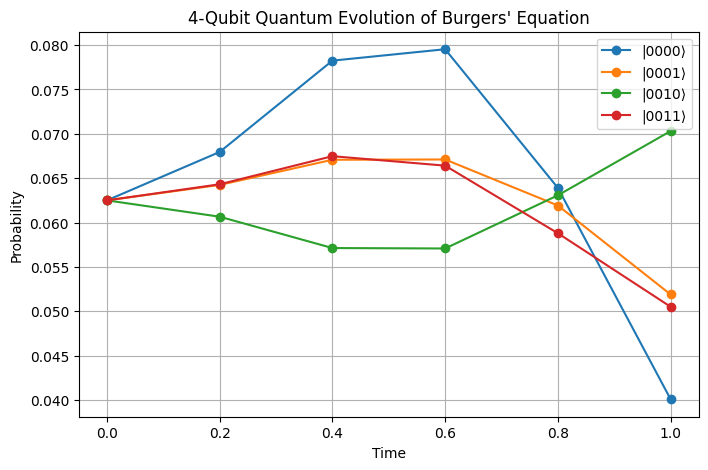

In [18]:
# plot only first 4 for clarity
labels= [format(i, '04b') for i in range(16)]
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(4): 
    y = [p[i] for p in Quantum_results]
    ax.plot(times, y, marker='o', label=f'|{labels[i]}⟩')

ax.set_title("4-Qubit Quantum Evolution of Burgers' Equation")
ax.set_xlabel("Time")
ax.set_ylabel("Probability")
ax.legend()
plt.grid(True)
plt.show()

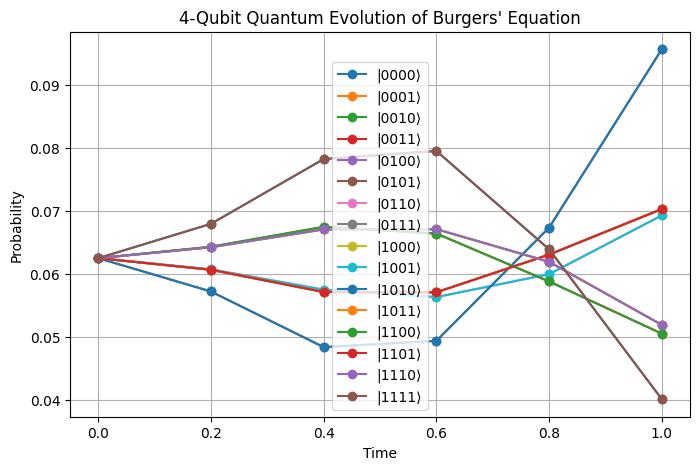

In [19]:
# plot for all the possibility
labels= [format(i, '04b') for i in range(16)]
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(16):  # plot for all possibility
    y = [p[i] for p in Quantum_results]
    ax.plot(times, y, marker='o', label=f'|{labels[i]}⟩')

ax.set_title("4-Qubit Quantum Evolution of Burgers' Equation")
ax.set_xlabel("Time")
ax.set_ylabel("Probability")
ax.legend()
plt.grid(True)
plt.show()

# HSE Quantum Burgers' Equation with Depolarizing Noise

#### Using a noise-aware device

In [20]:
dev = qml.device("default.mixed", wires=2)

#### Define the Hamiltonian

In [21]:
def burgers_hamiltonian(nu):
    return nu * qml.PauliZ(0) @ qml.PauliZ(1) + qml.PauliX(0)    # Burgers' simplified Hamiltonian using Z ⊗ Z and X terms

#### Define quantum circuit with noise

In [22]:
@qml.qnode(dev)
def quantum_burgers_circuit_noisy(time, nu, noise_strength):
    # Initial state: equal superposition
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

    # Add depolarizing noise after each Hadamard
    qml.DepolarizingChannel(noise_strength, wires=0)
    qml.DepolarizingChannel(noise_strength, wires=1)

    # Define Hamiltonian and apply Trotterized evolution
    H = burgers_hamiltonian(nu)
    qml.ApproxTimeEvolution(H, time, 10)

    # Add depolarizing noise after evolution
    qml.DepolarizingChannel(noise_strength, wires=0)
    qml.DepolarizingChannel(noise_strength, wires=1)

    return qml.probs(wires=[0, 1])

#### Run Simulation Over Time Steps

In [23]:
times = np.linspace(0, 1, 6)
nu = 0.1
noise_strength = 0.05  # Set between 0 (no noise) and 1 (max noise)
results_noisy = []

for t in times:
    probs = quantum_burgers_circuit_noisy(t, nu, noise_strength)
    results_noisy.append(probs)
    print(f"Time {t:.2f} with noise -> {probs}")

Time 0.00 with noise -> [0.25 0.25 0.25 0.25]
Time 0.20 with noise -> [0.25176234 0.24823766 0.24823766 0.25176234]
Time 0.40 with noise -> [0.25674066 0.24325934 0.24325934 0.25674066]
Time 0.60 with noise -> [0.26406271 0.23593729 0.23593729 0.26406271]
Time 0.80 with noise -> [0.27244483 0.22755517 0.22755517 0.27244483]
Time 1.00 with noise -> [0.28041597 0.21958403 0.21958403 0.28041597]


#### Plot the Time Evolution of the Probability Distribution

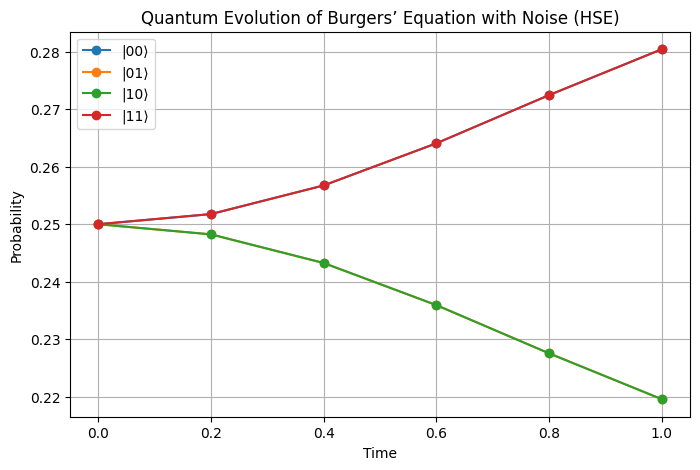

In [24]:
labels = ['00', '01', '10', '11']
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(4):
    y = [p[i] for p in results_noisy]
    ax.plot(times, y, marker='o', label=f'|{labels[i]}⟩')

ax.set_title("Quantum Evolution of Burgers’ Equation with Noise (HSE)")
ax.set_xlabel("Time")
ax.set_ylabel("Probability")
ax.legend()
plt.grid(True)
plt.show()